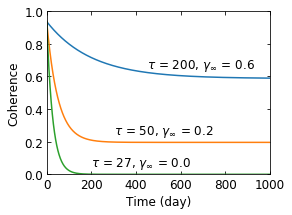

In [45]:
## coherence model changing through time 
import os
import numpy as np
import matplotlib.pyplot as plt
from pysar.objects import sensor
from pysar.utils import readfile, utils as ut, network as pnet
from pysar.simulation.plot import *

out_dir = '/Users/yunjunz/development/python/2018_ComputGeosci_PySAR'
out_file = os.path.join(out_dir, 'decorrelation_function{}'.format(fig_ext))

sensor_name = 'Sen'
pbase = 100  # m
ref_file = '/Users/yunjunz/insarlab/PYSAR_EXAMPLE/AlcedoSenDT128/PYSAR/INPUTS/geometryRadar.h5'
atr = readfile.read_attribute(ref_file)

# Thermal decorrelation (Zebker and Villasenor, 1992, Eq.4)
SNR = sensor.signal2noise_ratio(sensor_name)
coh_thermal = 1. / (1. + 1./SNR)

# Geometric decorrelation (Hanssen, 2001, Eq. 4.4.12)
inc_angle = ut.incidence_angle(atr, dimension=0, print_msg=False)
pbase_c = pnet.critical_perp_baseline(sensor_name, inc_angle)
coh_geom = max((pbase_c - abs(pbase)) / pbase_c, 0.)

# Option 1: Temporal decorrelation - exponential delay model (Parizzi et al., 2009; Morishita and Hanssen, 2015)
tbase = np.linspace(0,1000, num=1000)
fig, ax = plt.subplots(figsize=[4, 3])
for coh_resid, decor_time, xy in zip([0.6, 0.2, 0.0],
                                     [200, 50, 27],
                                     [(0.45, 0.65), (0.3, 0.25), (0.2, 0.05)]):
    coh_temp = np.multiply((coh_thermal - coh_resid),
                           np.exp(-1*abs(tbase)/decor_time)) + coh_resid
    coh = coh_geom * coh_temp

    label = r'$\tau$ = {}, $\gamma_\infty$ = {}'.format(decor_time, coh_resid)
    ax.plot(tbase, coh, label=label)
    ax.annotate(label, xy=xy, color='k', xycoords='axes fraction', fontsize=font_size)
plt.ylim([0, 1])
plt.xlim([min(tbase), max(tbase)])
ax.tick_params(which='both', direction='in', labelsize=font_size, bottom=True, top=True, left=True, right=True)
plt.xlabel('Time (day)', fontsize=font_size)
plt.ylabel('Coherence', fontsize=font_size)
#plt.legend(loc='upper right', frameon=False, fontsize=font_size, ncol=1)

plt.savefig(out_file, bbox_inches='tight', dpi=fig_dpi)
plt.show()